## 슬롯 확률 맞추기

### 게임기의 확률 추론하기

- 슬록마다 확률이 모두 다를 떄

In [5]:
import numpy as np

game = np.random.rand()

In [8]:
# 1. 게임을 많이 해보기
rewards = []

for i in range(1, 1001):
    if np.random.rand() <= game:
        r = 1
    else:
        r = 0
    rewards.append(r)
    print(sum(rewards) / i) ##이 부분이 너무 비효율적

1.0
0.5
0.6666666666666666
0.75
0.8
0.6666666666666666
0.5714285714285714
0.5
0.5555555555555556
0.5
0.45454545454545453
0.4166666666666667
0.38461538461538464
0.42857142857142855
0.4666666666666667
0.4375
0.4117647058823529
0.4444444444444444
0.42105263157894735
0.45
0.47619047619047616
0.5
0.4782608695652174
0.5
0.48
0.5
0.5185185185185185
0.5357142857142857
0.5517241379310345
0.5666666666666667
0.5806451612903226
0.5625
0.5757575757575758
0.5882352941176471
0.6
0.6111111111111112
0.6216216216216216
0.631578947368421
0.6410256410256411
0.625
0.6097560975609756
0.5952380952380952
0.5813953488372093
0.5909090909090909
0.6
0.6086956521739131
0.6170212765957447
0.625
0.6326530612244898
0.62
0.6274509803921569
0.6346153846153846
0.6415094339622641
0.6481481481481481
0.6363636363636364
0.625
0.6140350877192983
0.6206896551724138
0.6101694915254238
0.6
0.5901639344262295
0.5967741935483871
0.5873015873015873
0.578125
0.5692307692307692
0.5606060606060606
0.5522388059701493
0.558823529411764

In [9]:
game

# sum(rewards) / i가 game에 거의 근사함
# 0.571 vs 0.566

0.5664900886826809

In [10]:
# 2. n-1의 확률을 이용해서 n 유추하기(효율적)
Q = 0
for n in range(1, 1001):
    if np.random.rand() <= game:
        r = 1
    else:
        r = 0
    Q = (r - Q) / n + Q #다음 확률 -> Q_n이고 식의 Q는 Q_n-1

Q

0.5359999999999997

- 슬롯 10개(슬롯 마다 확률이 모두 다르고 확률은 우린 모름)

In [13]:
class Game:
    def __init__(self, arms = 10):
        self.rates = np.random.rand(arms)
        
    def play(self, arms):
        rate = self.rates[arms]
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [14]:
game = Game()

In [16]:
## 연습
for i in range(10):
    print(game.play(1)) #0번째 게임기를 돌림

1
0
1
0
0
0
0
0
0
0


In [17]:
Qs = np.zeros(10)
Ns = np.zeros(10)

for n in range(1000):
    action = np.random.randint(1, 10) #0~9번 중 아무 게임기 고르기
    r = game.play(action)

    Ns[action] += 1
    Qs[action] += (r - Qs[action]) / Ns[action] #전 확률 이용 방식s = np.zeros(10)
Ns = np.zeros(10)

for n in range(1000):
    action = np.random.randint(1, 10) #0~9번 중 아무 게임기 고르기
    r = game.play(action)

    Ns[action] += 1
    Qs[action] += (r - Qs[action]) / Ns[action] #전 확률 이용 방식

Qs

array([0.        , 0.21782178, 0.96039604, 0.55238095, 0.57692308,
       0.21100917, 0.85576923, 0.2421875 , 0.1300813 , 0.272     ])

- 좋은 슬롯을 고르고 그 슬롯을 위주로 사용하기

In [22]:
#사람클래스
# 10%확률로 다른 슬롯도 도전

class Agent:
    def __init__(self,epsilon, action_size = 10):
        self.epsilon = epsilon #무작위로 행동할 확률
        self.Qs = np.zeros(action_size)
        self.Ns = np.zeros(action_size)

    def update(self, action, reward):
        self.Ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.Ns[action]

    def get_action(self):
        if np.random.rand() <= self.epsilon:
            return np.random.randint(0, len(self.Qs))
        else:
            return np.argmax(self.Qs)

In [26]:
#총 몇번 이길까?
#강화 학습 : 컴퓨터를 어떤 환경에 넣어놓는 것 -> 사람을 만들어서 게임장이라는 환경에 넣어버림
## 밴디트 알고리즘

steps = 1000
epsilon = 0.1

game = Game()
agent = Agent(epsilon)

total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action()
    reward = game.play(action)

    total_reward += reward
    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))

In [28]:
total_reward #1000번 중에 856번 이김

856

<function matplotlib.pyplot.show(close=None, block=None)>

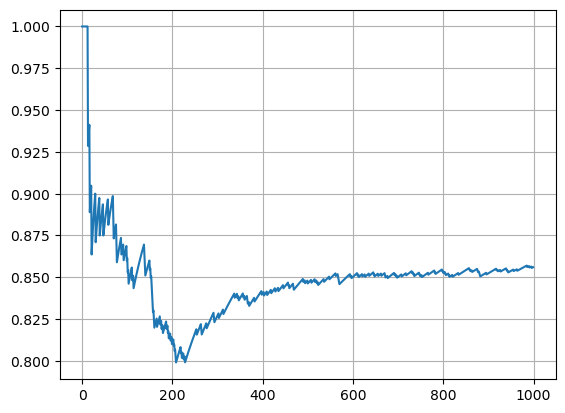

In [30]:
import matplotlib.pyplot as plt
plt.plot(rates)
plt.grid()
plt.show

- 위와 동일할 때, 평균적인 성능 향상 정도 확인하기

In [35]:
runs = 200
all_rates = np.zeros((runs, steps))

# np.zeros(): NumPy 라이브러리의 함수로, 모든 값이 0인 배열을 생성
# (runs, steps): 배열의 크기를 지정합니다. 여기서는 runs개의 행과 steps개의 열을 가진 2차원 배열(행렬)을 생성

In [36]:
#퍙균적인 성능 구하기
for run in range(runs):
    game = Game()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []
    for step in range(steps):
        action = agent.get_action()
        reward = game.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (step + 1))
    all_rates[run] = rates

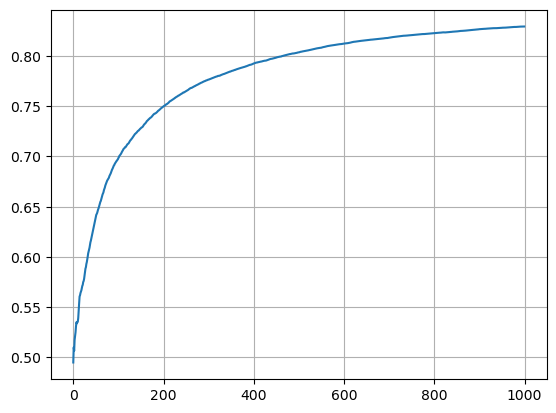

In [37]:
avg_rates = all_rates.mean(axis = 0) #각 위치에 있는 평균값

#평균적으로 확률을 어떻게 올려나가는가
plt.plot(avg_rates)
plt.grid()
plt.show()

- epsilon을 0.01, 0.1, 0.3으로 설정한 후에 비교하기

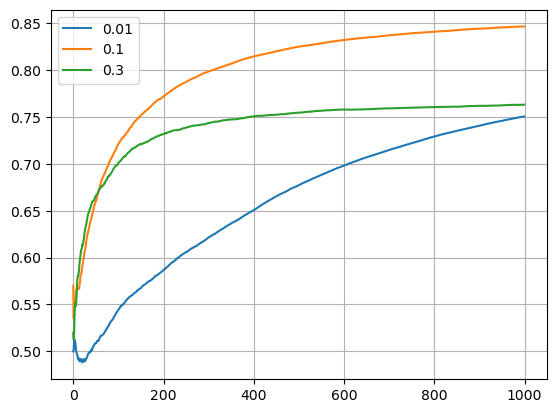

In [41]:
for e in [0.01, 0.1, 0.3]:
    runs = 200
    all_rates = np.zeros((runs, steps))
    
    for run in range(runs):
        game = Game()
        agent = Agent(e)
        total_reward = 0
        rates = []
        for step in range(steps):
            action = agent.get_action()
            reward = game.play(action)
            agent.update(action, reward)
            total_reward += reward
            rates.append(total_reward / (step + 1))
        all_rates[run] = rates

    avg_rates = all_rates.mean(axis = 0)

    plt.plot(avg_rates, label = str(e))

plt.grid()
plt.legend()
plt.show()

- 매번 슬롯들의 확률을 조금씩 변형한다면?

In [45]:
class Game2:
    def __init__(self, arms = 10):
        self.arms = arms
        self.rates = np.random.rand(arms)
        
    def play(self, arms):
        rate = self.rates[arms]
        self.rates += 0.1 * np.random.randn(self.arms) #노이즈 추가

        if rate > np.random.rand():
            return 1
        else:
            return 0

In [49]:
class Agent2:
    def __init__(self,epsilon, alpha, action_size = 10):
        self.epsilon = epsilon #무작위로 행동할 확률
        self.Qs = np.zeros(action_size)
        self.alpha = alpha
        
    def update(self, action, reward):
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha

    def get_action(self):
        if np.random.rand() <= self.epsilon:
            return np.random.randint(0, len(self.Qs))
        else:
            return np.argmax(self.Qs)

In [50]:
runs = 200
steps = 1000
epsilon = 0.1
alpha = 0.8
types = ['sample average', "alpha const update"]
results = {}

for agent_type in types:
    all_rates = np.zeros((runs, steps))
    for run in range(runs): #시물레이션 돌리기
        if agent_type == "sample average":
            agent = Agent(epsilon)
        else:
            agent = Agent2(epsilon, alpha) #최신경향에 가중치를 줌

        game = Game2()
        total_reward = 0
        rates = []
    
        for step in range(steps):
            action = agent.get_action()
            reward = game.play(action)
            agent.update(action, reward)
            total_reward += reward
            rates.append(total_reward / (step + 1))

        all_rates[run] = rates

    avg_rates = np.mean(all_rates, axis = 0)
    results[agent_type] = avg_rates

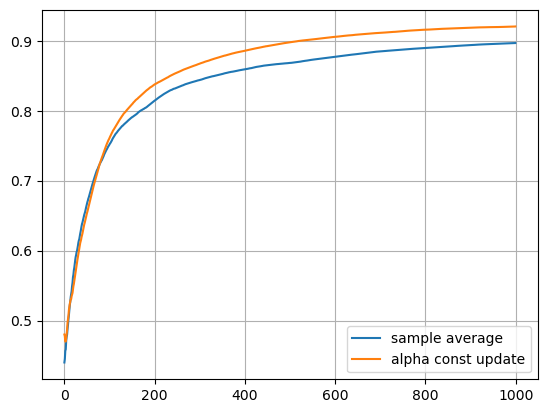

In [52]:
for key, avg_rates in results.items():
    plt.plot(avg_rates, label = key)

plt.grid()
plt.legend()
plt.show()

## 밴디트 알고리즘을 이용해서 상승장 종목 찾기

- #하루에 5% 이상 오르면 보상

In [61]:
import os
import pandas as pd
import FinanceDataReader as fdr
from tqdm import tqdm

In [62]:
kospi = fdr.StockListing("KOSPI")

In [63]:
total_reward = 0
alpha = 0.8 #가중치 같은 느낌
box = []
count = 0
total_count = 0

# 보상할지 말지 결정
for i in tqdm(range(len(kospi))):
    a = kospi.iloc[i]
    code = a['Code']
    name = a['Name']
    df = fdr.DataReader(code)

    Q = 0 #종목마다 확률이 다름

    for j in range(len(df) - 1):
        if df.iloc[j]['Close'] * 1.05 < df.iloc[j+1]['Close']:
            reward = 1
        else:
            reward = 0
#진짜 적중했을 때를 count
        if Q > 0.9:
            total_count += 1
            if reward == 1:
                count += 1 
            rates.append(count / total_count)
        
#결정나고 나서 Q 갱신
        Q = Q + (reward - Q) * alpha #Q는 보상쓰

#종목 저장
    box.append([name, Q])

100%|████████████████████████████████████████████████████████████████████████████████| 958/958 [22:09<00:00,  1.39s/it]


In [65]:
df = pd.DataFrame(box, columns = ['종목', 'Q'])
df = df.sort_values("Q", ascending = False)
df[df['Q'] > 0.9]

,종목,Q
357,YG PLUS,0.9984
156,더존비즈온,0.9600


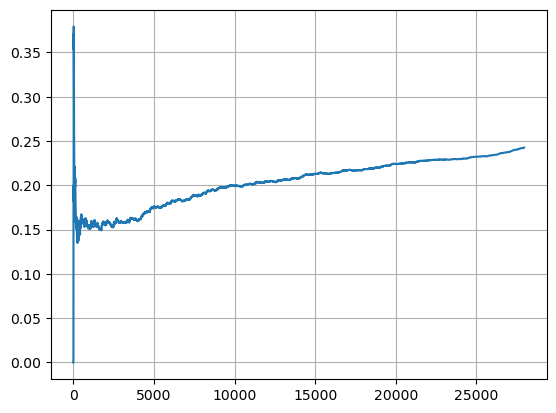

In [66]:
plt.plot(rates)
plt.grid()
plt.show()